In [1]:
# Setup code for the notebook
%matplotlib notebook
# Autoreload external python modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

from ipytools import display_imshow
from ipytools import readGTIFF
from ipytools import writeGTIFF
from ipytools import readGTIFFmeta
from ipytools import display_gallery
from ipytools import display_RSO

from glob import glob

In [2]:
# Reset matplotlib theme
res = %env
if res['USER'] == "vmatthys":
    # import jtplot module in notebook
    from jupyterthemes import jtplot
    # reset default matplotlib rcParams
    jtplot.reset()

# Data handler

In [3]:
# Video
VIDEO = "../data/s02_20150507T020554Z/"
# Triplets
TRIPLETS = "../data/s03_20161003T16*/"
TRIPLETS_panchromatic = TRIPLETS + "panchromatic/"
TRIPLETS_pansharp = TRIPLETS + "pansharp/*"

In [4]:
glob(TRIPLETS + "panchromatic")

['../data/s03_20161003T161231Z/panchromatic',
 '../data/s03_20161003T161148Z/panchromatic',
 '../data/s03_20161003T161107Z/panchromatic']

In [5]:
TRIPLETS_pansharp

'../data/s03_20161003T16*/pansharp/*'

In [56]:
# List of all tif files for s02 panchromatic
lst_tif = glob(TRIPLETS_panchromatic + "*.tif")
lst_tif

['../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d2_0008.tif',
 '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0014.tif',
 '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d3_0014.tif',
 '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d2_0002.tif',
 '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d2_0018.tif',
 '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d2_0010.tif',
 '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0002.tif',
 '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0005.tif',
 '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0017.tif',
 '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d2_0011.tif',
 '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d2_0004.tif',
 '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0004.tif',
 '..

In [78]:
# Dictionary of triplets
triplets = {}
for img in lst_tif:
    day, nu = img.split("_")[-2:]
    nu = nu.split(".tif")[0]
    if day not in triplets.keys():
        triplets[day] = {}
    if nu not in triplets[day].keys():
        triplets[day][nu] = []
    triplets[day][nu] += [img]

In [79]:
triplets

{'d1': {'0001': ['../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0001.tif',
   '../data/s03_20161003T161148Z/panchromatic/s03_20161003T161148Z_pan_d1_0001.tif',
   '../data/s03_20161003T161107Z/panchromatic/s03_20161003T161107Z_pan_d1_0001.tif'],
  '0002': ['../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0002.tif',
   '../data/s03_20161003T161148Z/panchromatic/s03_20161003T161148Z_pan_d1_0002.tif',
   '../data/s03_20161003T161107Z/panchromatic/s03_20161003T161107Z_pan_d1_0002.tif'],
  '0003': ['../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0003.tif',
   '../data/s03_20161003T161148Z/panchromatic/s03_20161003T161148Z_pan_d1_0003.tif',
   '../data/s03_20161003T161107Z/panchromatic/s03_20161003T161107Z_pan_d1_0003.tif'],
  '0004': ['../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0004.tif',
   '../data/s03_20161003T161148Z/panchromatic/s03_20161003T161148Z_pan_d1_0004.tif',
   '../data/s03_20161003

OK


In [48]:
def data_handler(instant, roi = None, lst_tif = lst_tif):
    """
    Returns the triplet corresponding to instant with the corresponding labels
    
    Input:
    ------
    instant: str
             pattern to search into lst_tif
    lst_tif: list of str
             list of tif files
    roi:     dictionary
               keys: [x, y, w, h]
               values: integers
             region of interest
    Output:
    -------
    out:
    labels:
    """
    out = []
    labels = []
    if roi is not None:
        assert all(key in roi.keys() for key in ["x", "y", "w", "h"]),\
        "Missing keys for roi"
        x, w, y, h = roi['x'], roi['w'], roi['y'], roi['h']
    for img in lst_tif:
        if instant in img:
            print (img)
            labels += [img]
            if roi is not None:
                out += [display_RSO(readGTIFF(img)[y:y+h, x:x+w], plot = False)]
            else:
                out += [display_RSO(readGTIFF(img), plot = False)]
    return out, labels

<IPython.core.display.Javascript object>


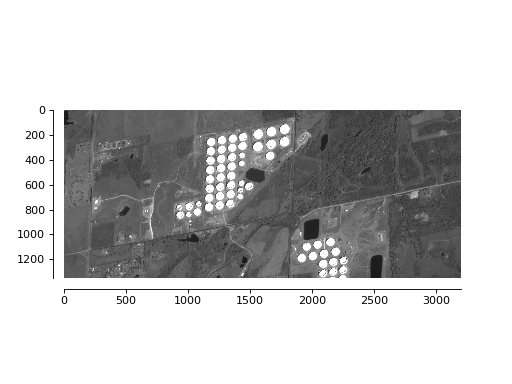

<IPython.core.display.Javascript object>


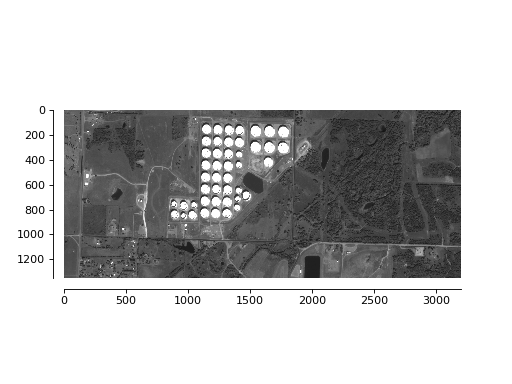

<IPython.core.display.Javascript object>


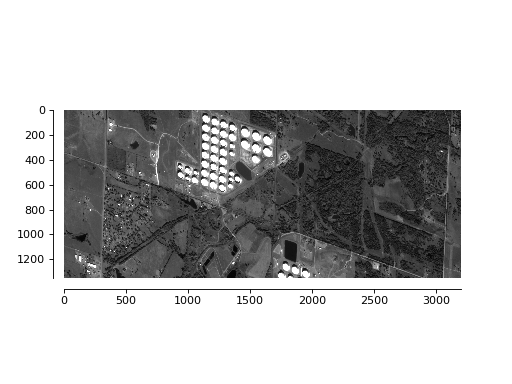

In [45]:
for i in range(3):
    display_imshow(d2_9[i])

../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d2_0009.tif
../data/s03_20161003T161148Z/panchromatic/s03_20161003T161148Z_pan_d2_0009.tif
../data/s03_20161003T161107Z/panchromatic/s03_20161003T161107Z_pan_d2_0009.tif



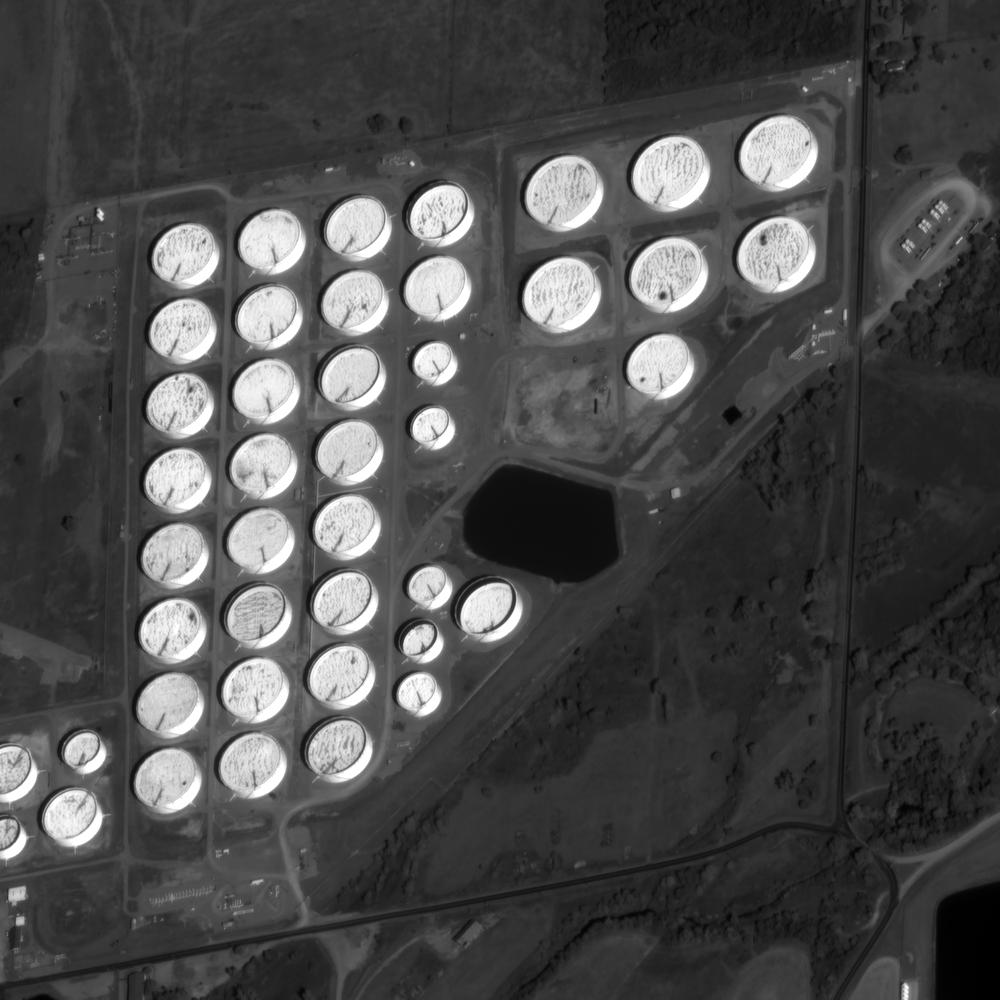
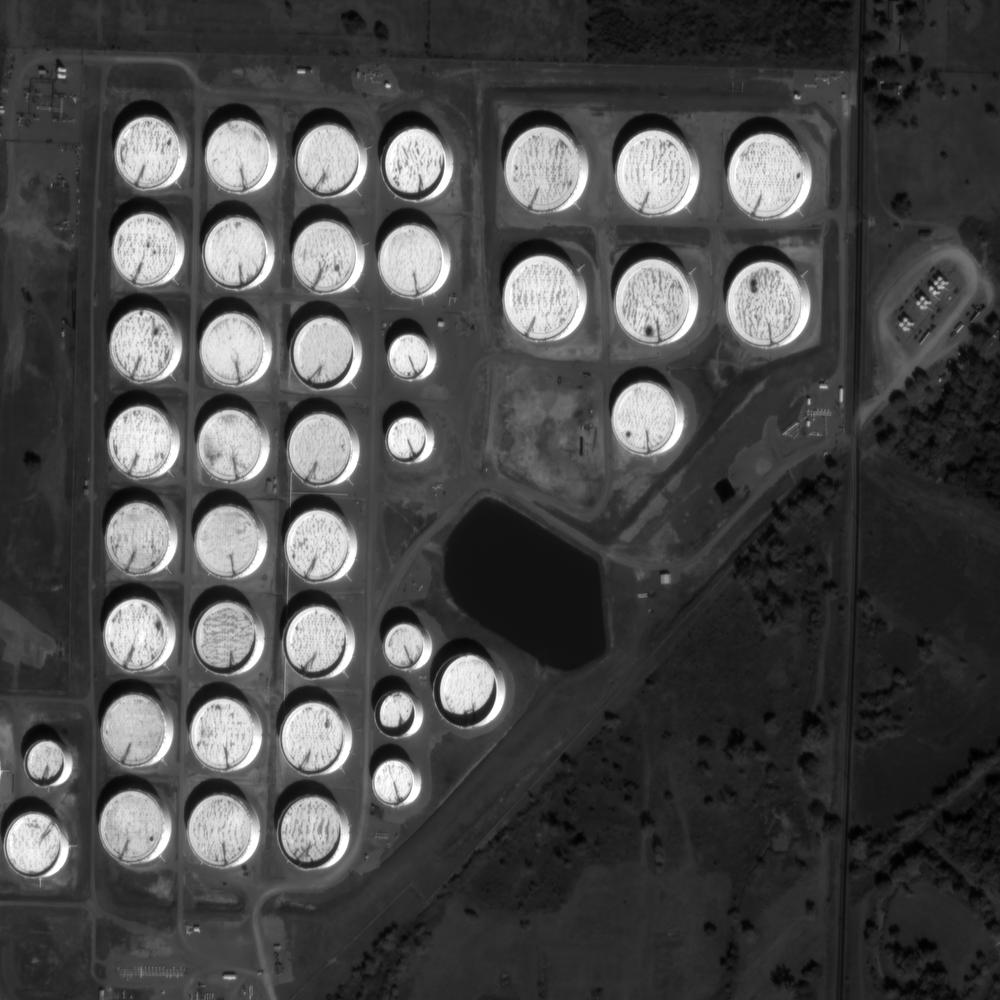
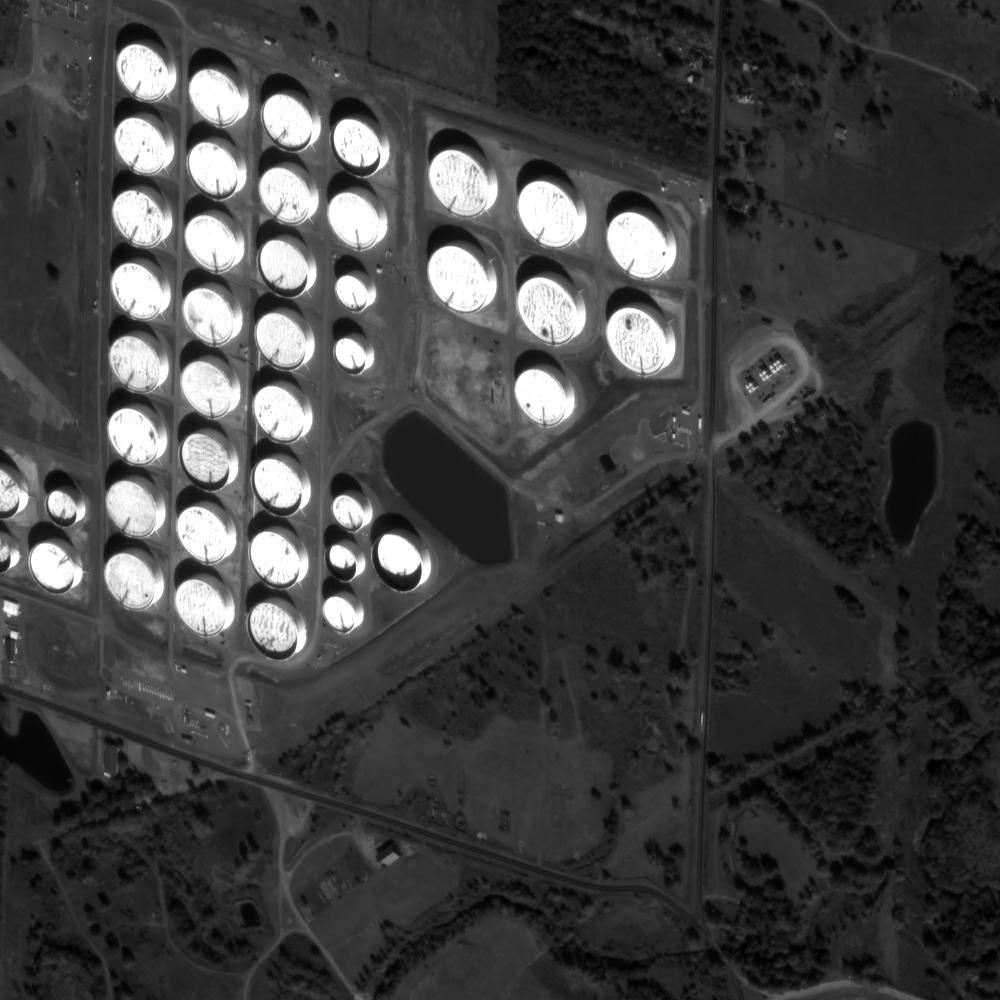

In [52]:
roi = {
    "x": 1000,
    "y": 0,
    "w": 1000,
    "h": 1000
}
d2_9, labels = data_handler("d2_0009", roi = roi)
display_gallery(d2_9, labels)

<IPython.core.display.Javascript object>


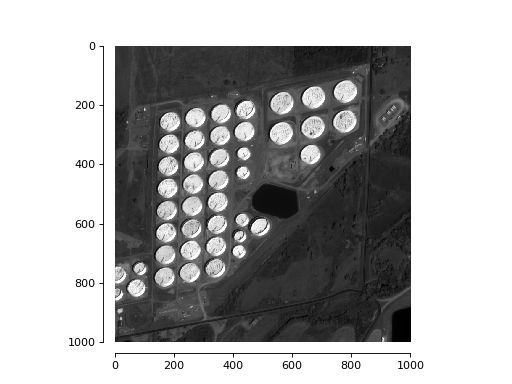

In [93]:
display_imshow(d2_9[0])

# Config json

In [88]:
def workaround_json_int64(o):
    if isinstance(o,np.integer) : return int(o)
    raise TypeError
    
import json
def write_json(duet, roi=None):
    """
    duet = triplets['d1']['0001'][:2]
    """
    # Get current config file
    with open('config.json', 'r') as f:
        user_cfg = json.load(f)
    user_cfg['out_dir'] = './output'
    # Config path of images and RPC
    user_cfg['images'] = [
        {
            "img": duet[i],
            "rpc": duet[i].replace(".tif", "_rpc.txt")
        }
        for i in range(len(duet))]
    # Config ROI 
    if (roi == None):
        user_cfg["full_img"] = True
    else:
        user_cfg["full_img"] = False
        user_cfg["roi"] = roi
    # Modify config file   
    with open('config.json', 'w') as f:
        json.dump(user_cfg, f, indent=2, default=workaround_json_int64)

In [95]:
# With the first duet of d2 009 triplet
write_json(triplets['d2']['0009'][:2], roi)

<IPython.core.display.Javascript object>


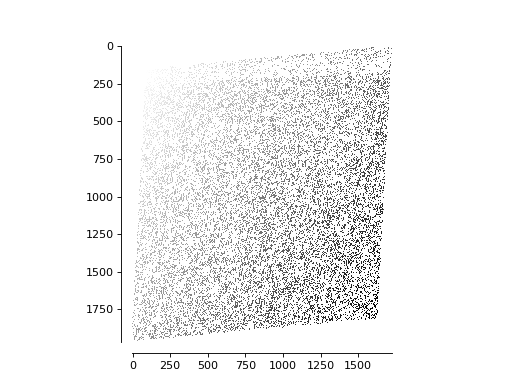

In [96]:
display_imshow(readGTIFF("output/dsm.tif"))

In [ ]:
write_json(triplets['d2']['0009'][1:], roi)

<IPython.core.display.Javascript object>


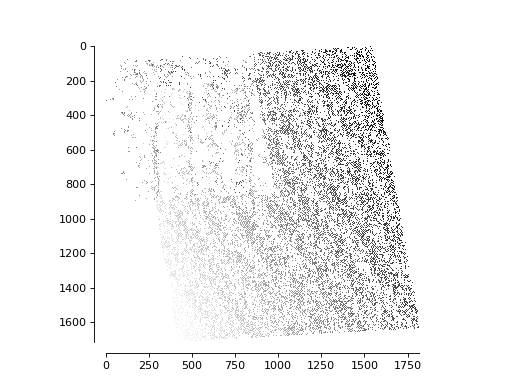

In [97]:
display_imshow(readGTIFF("output/dsm.tif"))

In [ ]:
display_gallery([simple_equalization_8bit(readGTIFF(a_ref)), simple_equalization_8bit(readGTIFF(a_sec))])